**Problem-2:**

Construct a combination of four Linear Congruential Generators to form a Combined linear congruential generator (CLCG) with the parameters for the four LCGs as: \
\
$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~a_1 = 8003;~m_1 = 2^{64};~c_1 = 0$ \
$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~a_2 = 8005;~m_2 = 2^{32};~c_2 = 0$ \
$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~a_3 = 8083;~m_3 = 2^{16};~c_3 = 0$ \
$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~a_4 = 8085;~m_4 = 2^{8};~c_4 = 0$ 

The system will arbitrarily choose a generated random number from its list and input it to the Hangman Game (which is shown here) and predict the number by guessing its digits (from 0 - 9) one at a time and the game continues.\
\
At last, show that the datas obtained from the CLCG satisfy the Kolmogorov-Smirnov Test for Normality and hence discuss your CLCG.

**(The reason we are taking these parameter values are described properly in the report)**

**Solution-2:**

*we need to notice that the values of $c_1 = c_2 = c_3 = c_4 = 0 $.*

A random number generated by the CLCG is: 16172260832451435169
Similarly, a random number between 0 and 1 generated by the CLCG is: 0.8767000164273039


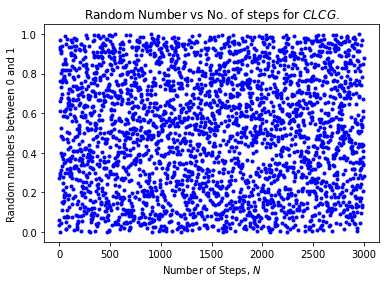

Ok, now let us play a game of Hangman. The number you will get will be random.
  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ? 
This random number has 19 digits.
You have 11 chances left to guess it correctly.
(type 'skip' to skip) 
Wow, it's a correct guess!!!
 1 ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ? 1
This random number has 19 digits.
You have 11 chances left to guess it correctly.
(type 'skip' to skip) 
Wow, it's a correct guess!!!
 1 ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ? 4 ?  ?  ?  ?  ? 1
This random number has 19 digits.
You have 11 chances left to guess it correctly.
(type 'skip' to skip) 
Wrong guess! Try again.
 1 ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ? 4 ?  ?  ?  ?  ? 1
This random number has 19 digits.
You have 10 chances left to guess it correctly.
(type 'skip' to skip) 
Wow, it's a correct guess!!!
 1 ?  ?  ? 3 ?  ?  ?  ?  ?  ?  ? 4 ?  ?  ?  ?  ? 1
This random number has 19 digits.
You have 10 chances left to guess it correctly.
(type 'skip' to skip) 
Wow, it's a co

In [4]:
from pylab import show
import random
import matplotlib.pyplot as plt

k = 4; N = 3000         #defining the value of N and no. of LCGs (k=4).
#setting the parameters for the 4 LCGs.
a1 = 8003; m1 = 2**64; c1 = 0; x1 = random.randint(1, m1-1) 
a2 = 8005; m2 = 2**32; c2 = 0; x2 = random.randint(1, m2-1) 
a3 = 8083; m3 = 2**16; c3 = 0; x3 = random.randint(1, m3-1) 
a4 = 8085; m4 = 2**8; c4 = 0; x4 = random.randint(1, m4-1)  
results_1 = []; results_2 = []; results_3 = []; results_4 = []  #blank list for containing the values of Random numbers.
yval = []; rval = []
for i in range(N):          #performing the algorithm.
    x1 = (a1*x1+c1)%m1
    x2 = (a2*x2+c2)%m2
    x3 = (a3*x3+c3)%m3
    x4 = (a4*x4+c4)%m4
    results_1.append(x1)        #addding the results.
    results_2.append(x2)
    results_3.append(x3) 
    results_4.append(x4)
    #solving the CLCG equation for the both.
    Y = (x1 - x2 + x3 - x4)%m1  
    yval.append(Y) 
    #calculating the random number between 0 and 1.
    if Y > 0:
        r = Y/m1
    elif Y < 0:
        r = Y/m1 + 1
    else:
        r = (m1-1)/m1 
    rval.append(r)  
print('A random number generated by the CLCG is:', Y) 
print('Similarly, a random number between 0 and 1 generated by the CLCG is:', r) 
plt.plot(rval,'.b', label = "clcg2")     #plotting r vs N. 
plt.title("Random Number vs No. of steps for $CLCG$.")
plt.xlabel("Number of Steps, $N$")
plt.ylabel("Random numbers between 0 and 1")  
plt.show() 
################################
# GAME OF HANGMAN using the RNG#
################################
print('Ok, now let us play a game of Hangman. The number you will get will be random.')
name2 = [str(i) for i in yval]          #converting the random numbers in the list to str. 
a = random.randint(0,len(yval))       #choosing the random number.    
m = name2[a]; Y = []                #choosing the indices.
X = [char for char in m] 
for i in range(len(m)):          
    Y.append(" ? ")         #choosing the number length and starting the game.
CHANCES = int(len(m)*3/5)   #counting the number of chances.
while CHANCES > 0:
    q = " "
    for j in range(len(Y)):     #for chances greater than 0. 
        q += Y[j]
    print(q)                 
    print("This random number has "+str(len(Y))+" digits.")     #displaying the necessary info.
    print("You have "+str(CHANCES)+" chances left to guess it correctly.")
    print("(type 'skip' to skip) ")
    answer = input("Guess a digit from 0 - 9 of the number.").upper()  #taking the input from the player.
    if(answer in X):                                                           
        print("Wow, it's a correct guess!!!") 
        for i in range(len(X)):         #checking for the answer in the number.
            if X[i] == answer:
                Y[i] = answer                                 
                if " ? " not in Y:                 #when we have predicted all the digits.     
                    print("Congratulations, You won! The random number was " + m + ".")
                    CHANCES = 0        #for chances == 0.                     
    elif answer == "SKIP":                #for skipping the game.                     
        CHANCES = 0                                                                              
        print("Sorry to see you go, The random number was "+ m + ".") 
    else:                                          #for the final part of the game in case of wrong answers.      
        CHANCES -= 1                                  
        print("Wrong guess! Try again.")            
        if CHANCES == 0:                                   
            print("So, Sorry. You lost the game. The random number was "+ m +".") 

show() 


**Now, we will check whether our Combined Linear Congruential Generator is really random or not.**


*We will implement The Kolmogorov-Smirnov test for Normality.*

In [5]:
import random
from math import sqrt
D_plus =[]; D_minus =[]; random_value =[]  #setting up blank list for D+, D- and values.
  
for i in range(0, len(rval)):       #Ranking the N random numbers.
    random_value.append(random.random())
    random_value.sort()
  
for i in range(1, len(rval) + 1):       #Calculating the max(i/N - R_i).
    x = i / len(rval) - random_value[i-1]
    D_plus.append(x)
  
for i in range(1, len(rval) + 1):       #Calculating the max(R_i-(i-1)/N).
    y = (i-1)/len(rval) 
    y = random_value[i-1]-y
    D_minus.append(y)
  
ans = max(sqrt(len(rval))*D_plus[i-1], sqrt(len(rval))*D_minus[i-1])  #Calculating the max(D+, D-)
D_alpha = 1.36/sqrt(len(rval))          #from reference materials.
print('The value of D is :', ans) 
print('The value of D_alpha is :', D_alpha) 
if ans > D_alpha: 
    print('So, we find that the results reject Uniformity.') 
else:
    print('It fails to reject the Null Hypothesis.') 

The value of D is : 0.11046467308898456
The value of D_alpha is : 0.024830089273567533
So, we find that the results reject Uniformity.


*Exporting our random numbers to a .csv file for brevity.*

In [6]:
textfileclcg = open("random_values_clcg.csv", "w") #for the actual random numbers.
name_clg = [str(i) for i in yval]  
for element in name_clg:
    textfileclcg.write(element + "\n")
textfileclcg.close()

In [7]:
textfileclcg2 = open("random_0_to_1_clcg.csv", "w") #for the random numbers generated between 0 and 1.
name_clg2 = [str(i) for i in rval]  
for element in name_clg2:
    textfileclcg2.write(element + "\n")
textfileclcg2.close() 